In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [2]:
df = pd.read_csv('flavors_of_cacao.csv')

In [3]:
print(df)

     Company \n(Maker-if known) Specific Bean Origin\nor Bar Name   REF  \
0                      A. Morin                       Agua Grande  1876   
1                      A. Morin                             Kpime  1676   
2                      A. Morin                            Atsane  1676   
3                      A. Morin                             Akata  1680   
4                      A. Morin                            Quilla  1704   
...                         ...                               ...   ...   
1790                     Zotter                              Peru   647   
1791                     Zotter                             Congo   749   
1792                     Zotter                      Kerala State   749   
1793                     Zotter                      Kerala State   781   
1794                     Zotter                Brazil, Mitzi Blue   486   

      Review\nDate Cocoa\nPercent Company\nLocation  Rating Bean\nType  \
0             2016       

In [4]:
df.columns = ['Company_Name','Origin','Ref','Review_Date','Cocoa_Pct','Company_Location','Rating','Bean_Type','Bean_Origin']
df.head(5)

,Company_Name,Origin,Ref,Review_Date,Cocoa_Pct,Company_Location,Rating,Bean_Type,Bean_Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [5]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)
print(df)

     Company_Name              Origin   Ref  Review_Date Cocoa_Pct  \
0        A. Morin         Agua Grande  1876         2016       63%   
1        A. Morin               Kpime  1676         2015       70%   
2        A. Morin              Atsane  1676         2015       70%   
3        A. Morin               Akata  1680         2015       70%   
4        A. Morin              Quilla  1704         2015       70%   
...           ...                 ...   ...          ...       ...   
1790       Zotter                Peru   647         2011       70%   
1791       Zotter               Congo   749         2011       65%   
1792       Zotter        Kerala State   749         2011       65%   
1793       Zotter        Kerala State   781         2011       62%   
1794       Zotter  Brazil, Mitzi Blue   486         2010       65%   

     Company_Location  Rating  Bean_Type Bean_Origin  
0              France    3.75               Sao Tome  
1              France    2.75                   T

In [6]:
# How many tuples are there?  Rows are equal to 1793

In [21]:
# How many unique company names are there in the dataset? 416 different companies
# I could count unique, but I need to encode later anyways.
df['Company_Name']= encoder.fit_transform(df['Company_Name'])
print(df['Company_Name'].max())

415


In [8]:
# How many reviews are made in 2013 in the dataset? 184 rows
df.loc[df['Review_Date'] == 2013]

,Company_Name,Origin,Ref,Review_Date,Cocoa_Pct,Company_Location,Rating,Bean_Type,Bean_Origin
10,0,Panama,1011,2013,70%,France,2.75,,Panama
11,0,Madagascar,1011,2013,70%,France,3.00,Criollo,Madagascar
12,0,Brazil,1011,2013,70%,France,3.25,,Brazil
13,0,Equateur,1011,2013,70%,France,3.75,,Ecuador
14,0,Colombie,1015,2013,70%,France,2.75,,Colombia
...,...,...,...,...,...,...,...,...,...
1738,401,Amazonas w/ nibs,1173,2013,75%,Ireland,2.75,Criollo,Peru
1741,402,"Java, Indonesian Black",1109,2013,100%,U.K.,2.25,,Indonesia
1751,404,"Camino Verde P., Balao, Guayas",1042,2013,70%,U.S.A.,3.25,,Ecuador
1752,404,Gran Couva,1042,2013,70%,U.S.A.,3.50,Trinitario,Trinidad


In [9]:
# In the BeanType Column, how many missing values are there? 887 rows
df['Bean_Type']= encoder.fit_transform(df['Bean_Type'])
df.loc[df['Bean_Type'] == 40]

,Company_Name,Origin,Ref,Review_Date,Cocoa_Pct,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,Agua Grande,1876,2016,63%,France,3.75,40,Sao Tome
1,0,Kpime,1676,2015,70%,France,2.75,40,Togo
2,0,Atsane,1676,2015,70%,France,3.00,40,Togo
3,0,Akata,1680,2015,70%,France,3.50,40,Togo
4,0,Quilla,1704,2015,70%,France,3.50,40,Peru
...,...,...,...,...,...,...,...,...,...
1787,410,Santo Domingo,879,2012,70%,Austria,3.75,40,Dominican Republic
1789,410,"Indianer, Raw",883,2012,58%,Austria,3.50,40,
1790,410,Peru,647,2011,70%,Austria,3.75,40,Peru
1793,410,Kerala State,781,2011,62%,Austria,3.25,40,India


(array([  4.,  13.,  32., 140., 259., 644., 602.,  97.,   0.,   2.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

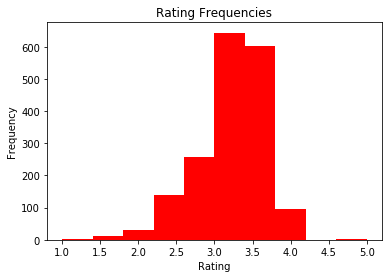

In [10]:
plt.title('Rating Frequencies')
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.hist(df.iloc[:,6], color='red')
# It seems there's a standard distribution of ratings given, implying a central tendency to all results.
# This could skew any in-depth analysis of these results - are the reveiwers skewed, or are there that many average
# Companies?  It's hard to tell without additional information.

In [11]:
# Change the type of values in the column percent from string values to numerical values.
df['Cocoa_Pct'] = df['Cocoa_Pct'].str.rstrip('%').astype('float') / 100.0
df

,Company_Name,Origin,Ref,Review_Date,Cocoa_Pct,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,Agua Grande,1876,2016,0.63,France,3.75,40,Sao Tome
1,0,Kpime,1676,2015,0.70,France,2.75,40,Togo
2,0,Atsane,1676,2015,0.70,France,3.00,40,Togo
3,0,Akata,1680,2015,0.70,France,3.50,40,Togo
4,0,Quilla,1704,2015,0.70,France,3.50,40,Peru
...,...,...,...,...,...,...,...,...,...
1790,410,Peru,647,2011,0.70,Austria,3.75,40,Peru
1791,410,Congo,749,2011,0.65,Austria,3.00,19,Congo
1792,410,Kerala State,749,2011,0.65,Austria,3.50,19,India
1793,410,Kerala State,781,2011,0.62,Austria,3.25,40,India


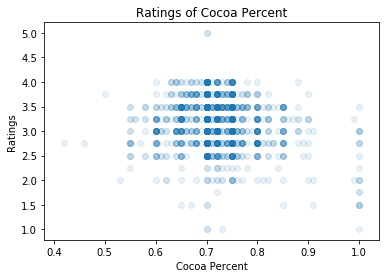

In [12]:
# Plot the converted numerical Cocoa Percent values against the Rating values!
plt.title('Ratings of Cocoa Percent')
plt.xlabel("Cocoa Percent")
plt.ylabel("Ratings")
plt.scatter(df.iloc[:,4],df.iloc[:,6], alpha=0.1)
# From what you see, does more cocoa in a bar correspond to a higher rating?
# No, the central tendancy occurs again, and as we can see the highest rating of Cocoa actually shows a lower
# frequency.  The highest frequency of ratings seems to be in the center - average ratings for 60-80% chocolate, with
# top ratings only going to 70% chocolate (but also the lowest ratings)

In [13]:
#
df[['Rating']] = scaler.fit_transform(df[['Rating']])
df

,Company_Name,Origin,Ref,Review_Date,Cocoa_Pct,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,Agua Grande,1876,2016,0.63,France,1.181356,40,Sao Tome
1,0,Kpime,1676,2015,0.70,France,-0.912734,40,Togo
2,0,Atsane,1676,2015,0.70,France,-0.389211,40,Togo
3,0,Akata,1680,2015,0.70,France,0.657834,40,Togo
4,0,Quilla,1704,2015,0.70,France,0.657834,40,Peru
...,...,...,...,...,...,...,...,...,...
1790,410,Peru,647,2011,0.70,Austria,1.181356,40,Peru
1791,410,Congo,749,2011,0.65,Austria,-0.389211,19,Congo
1792,410,Kerala State,749,2011,0.65,Austria,0.657834,19,India
1793,410,Kerala State,781,2011,0.62,Austria,0.134311,40,India


In [27]:
# for company_number in range(0,411):
# Find Company_Name - count number of instances of that company
# total sum of Ratings / Count
df_company_averagerating = df.groupby('Company_Name') \
        .agg({'Rating':'mean'}) \
        .rename(columns={'Rating':'Average_Rating'}) \
        .reset_index()
df_company_averagerating.sort_values(by=['Average_Rating'], ascending=False)

,Company_Name,Average_Rating
380,380,1.704879
287,287,1.443118
183,183,1.443118
14,14,1.382711
249,249,1.312237
...,...,...
197,197,-2.483301
226,226,-2.483301
228,228,-2.745062
64,64,-2.745062


In [30]:
# Suppose we are interested in the company’s names and locations for some collective analysis.
# Encode the two categorical columns with the encoder you think is best for the job!
df['Origin']= encoder.fit_transform(df['Origin'])
print(df['Origin'].max())
df

1037


,Company_Name,Origin,Ref,Review_Date,Cocoa_Pct,Company_Location,Rating,Bean_Type,Bean_Origin
0,0,14,1876,2016,0.63,France,1.181356,40,Sao Tome
1,0,492,1676,2015,0.70,France,-0.912734,40,Togo
2,0,67,1676,2015,0.70,France,-0.389211,40,Togo
3,0,15,1680,2015,0.70,France,0.657834,40,Togo
4,0,809,1704,2015,0.70,France,0.657834,40,Peru
...,...,...,...,...,...,...,...,...,...
1790,410,754,647,2011,0.70,Austria,1.181356,40,Peru
1791,410,258,749,2011,0.65,Austria,-0.389211,19,Congo
1792,410,483,749,2011,0.65,Austria,0.657834,19,India
1793,410,483,781,2011,0.62,Austria,0.134311,40,India
